# $\mathrm{J} \Lambda \mathbb{N} 0$ & Natalia
AI tools have been used to review parts of this solution.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [91]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=['teal', 'purple', 'orange'])

# 1. Synaptic current 

# (a) & (b)

In [92]:
# Params

pars_a_1 = {
    'tau_syn': 10 * 10**-3,
    'tau_m'  : 10 * 10**-3,
    'R_m'    : 1  * 10**7,
    'g_star' : 30 * 10**-9,
    'E_m'    : -80 * 10**-3,
    'E_exc'  : 0 * 10**-3,
    'E_inh'  : 0 * 10**-3,
    'E_syn'  : 0 * 10**-3,
    'g_exc'  : 0 * 10**-9,
    'g_inh'  : 0 * 10**-9,
    'I_e'    : 0 * 10**-9,
    'thr'    : -54 * 10**-3 
}


pars_a_2 = {
    'tau_syn': 10 * 10**-3,
    'tau_m'  : 10 * 10**-3,
    'R_m'    : 1  * 10**7,
    'g_star' : 30 * 10**-9,
    'E_m'    : -80 * 10**-3,
    'E_exc'  : 0 * 10**-3,
    'E_inh'  : 0 * 10**-3,
    'E_syn'  : -100 * 10**-3,
    'g_exc'  : 0 * 10**-9,
    'g_inh'  : 0 * 10**-9,
    'I_e'    : 0 * 10**-9,
    'thr'    : -54 * 10**-3 
}

pars_b = {
    'tau_syn': 10 * 10**-3,
    'tau_m'  : 10 * 10**-3,
    'R_m'    : 1  * 10**7,
    'g_star' : 30 * 10**-9,
    'E_m'    : -80 * 10**-3,
    'E_exc'  : 0 * 10**-3,
    'E_inh'  : -100 * 10**-3,
    'E_syn'  : 0 * 10**-3,
    'g_exc'  : 50 * 10**-9,
    'g_inh'  : 200 * 10**-9,
    'I_e'    : 0 * 10**-9,
    'thr'    : -54 * 10**-3   
}

ics = (-80*10**-3, 0, 0, 0)

In [93]:
def euler_synaptic_if(tmax, dt, pre_spike_times, ics, pars, reset=False):
    
    tau_syn = pars['tau_syn']
    tau_m   = pars['tau_m']
    R_m     = pars['R_m']
    g_star  = pars['g_star']
    E_m     = pars['E_m']
    E_exc   = pars['E_exc']
    E_inh   = pars['E_inh']
    E_syn   = pars['E_syn']
    g_exc   = pars['g_exc']
    g_inh   = pars['g_inh']
    I_e     = pars['I_e']
    thr     = pars['thr']

    V, x, g, I_syn = ics
    
    ts = np.arange(0, tmax, dt)
    Vs = np.array([])
    gs = np.array([])
    xs = np.array([])
    I_syns = np.array([])
    spiketimes = np.array([])
    
    for t in ts:

        if any(abs(t - ts0) < dt/2 for ts0 in pre_spike_times):
            x += g_star
        
        dVdt = ( -V + E_m - R_m*I_syn + R_m*I_e ) / tau_m
        dxdt = -x / tau_syn
        dgdt = (x - g) / tau_syn
        I_syn = g*(V - E_syn) + g_exc*(V - E_exc) + g_inh*(V - E_inh)
        
        V = V + dt*dVdt
        x = x + dt*dxdt
        g = g + dt*dgdt

        if reset == True and V >= thr:
            V = E_m
            spiketimes = np.append(spiketimes, t)
        
        Vs = np.append(Vs, V)
        gs = np.append(gs, g)
        xs = np.append(xs, x)
        I_syns = np.append(I_syns, I_syn)

    return {
        'ts' : ts / 10**-3, 
        'V_t' : Vs / 10**-3, 
        'g_syn_t' : gs / 10**-9, 
        'x_t' : xs, 
        'I_syn_t' : I_syns / 10**-9,
        'spiketimes' : spiketimes / 10**-3
        }


In [94]:
sol = []

for pars in [pars_a_1, pars_a_2, pars_b]:
    sol.append(euler_synaptic_if(tmax=0.2, dt=1e-4, pre_spike_times=[0.04], ics=ics, pars=pars))

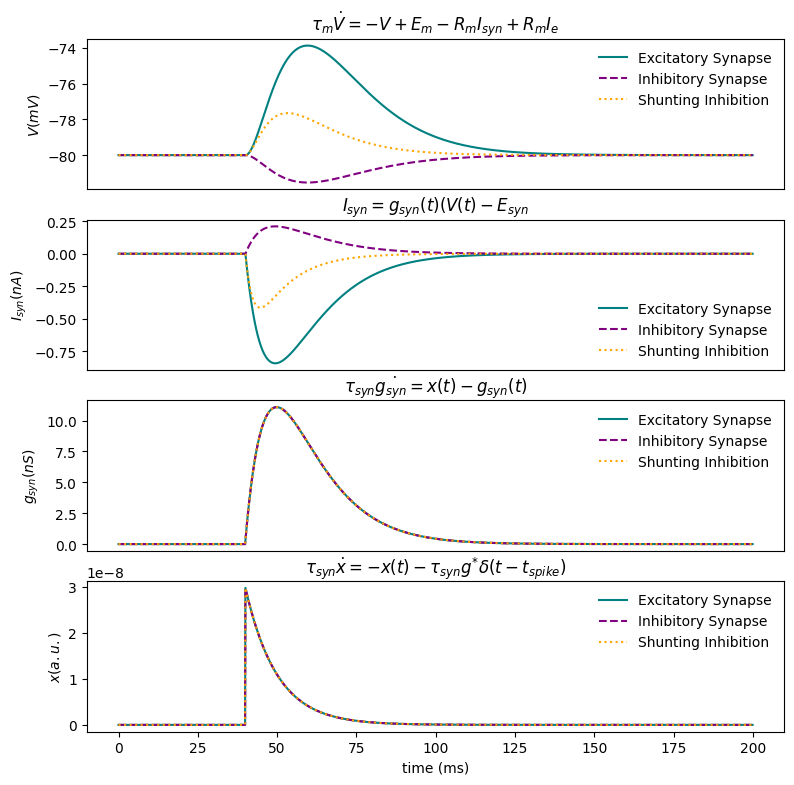

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 9))


ax1.plot(sol[0]["ts"], sol[0]['V_t'], label="Excitatory Synapse")
ax1.plot(sol[1]["ts"], sol[1]['V_t'], linestyle="--", label="Inhibitory Synapse")
ax1.plot(sol[2]["ts"], sol[2]['V_t'], linestyle=":", label="Shunting Inhibition")

ax2.plot(sol[0]["ts"], sol[0]['I_syn_t'], label="Excitatory Synapse")
ax2.plot(sol[1]["ts"], sol[1]['I_syn_t'], linestyle="--", label="Inhibitory Synapse")
ax2.plot(sol[2]["ts"], sol[2]['I_syn_t'], linestyle=":", label="Shunting Inhibition")

ax3.plot(sol[0]["ts"], sol[0]['g_syn_t'], label="Excitatory Synapse")
ax3.plot(sol[1]["ts"], sol[1]['g_syn_t'], linestyle="--", label="Inhibitory Synapse")
ax3.plot(sol[2]["ts"], sol[2]['g_syn_t'], linestyle=":", label="Shunting Inhibition")

ax4.plot(sol[0]["ts"], sol[0]['x_t'], label="Excitatory Synapse")
ax4.plot(sol[1]["ts"], sol[1]['x_t'], linestyle="--", label="Inhibitory Synapse")
ax4.plot(sol[2]["ts"], sol[2]['x_t'], linestyle=":", label="Shunting Inhibition")

for ax, title, ylabel in zip(
    [ax1, ax2, ax3, ax4],
    [
        "$\\tau_{m}\\dot{V} = -V + E_{m} - R_{m}I_{syn} + R_{m}I_{e}$",
        "$I_{syn} = g_{syn}(t)(V(t) - E_{syn}$",
        "$\\tau_{syn} \\dot{g_{syn}} = x(t) - g_{syn}(t)$",
        "$\\tau_{syn} \\dot{x} = -x(t) - \\tau_{syn}g^{*}\\delta(t-t_{spike})$"
    ],
    ["$V (mV)$", "$I_{syn} (nA)$", "$g_{syn} (nS)$", "$x (a.u.)$"]):

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend(frameon=False, loc='best')

    if ax != ax4:
        ax.set_xticks([])
    else:
        ax.set_xlabel("time (ms)")

plt.show()

# Explaining the differences

a.) The voltage deflection caused by the inhibtory synapse is much smaller than the one caused by the excitatory synapse due to the differences between the resting membrane potential and the respective reversal potentials (80 mV for the exc. synapse vs. 20 mV for the inh. synapse).

b.) Shunting inhibition introduces additional channels into the membrane, thereby increasing its effective leakiness and in turn decreases the input resistance and the membrane time constant. This leads to decreased integration of the synaptic input current and ultimately results in a smaller voltage defelction.

# 2. Integrate-and-fire neuron

# (a), (b) & (c)

In [96]:
def get_fr_ISI(spiketimes):
    spiketimes *= 10**-3
    if len(spiketimes) > 1:
        mean_isi = np.mean([spiketimes[i+1] - spiketimes[i] for i in range(len(spiketimes) - 1)])
        fr = 1 / mean_isi
    else:
        fr = 0
    return fr

In [97]:
def get_fr_num(spiketimes, simtime):
    if len(spiketimes) > 1:
        fr = len(spiketimes) / simtime
    else:
        fr = 0
    return fr

In [98]:
def analytical_fr(pars):

    tau_syn = pars['tau_syn']
    tau_m   = pars['tau_m']
    R_m     = pars['R_m']
    g_star  = pars['g_star']
    E_m     = pars['E_m']
    E_exc   = pars['E_exc']
    E_inh   = pars['E_inh']
    E_syn   = pars['E_syn']
    g_exc   = pars['g_exc']
    g_inh   = pars['g_inh']
    I_e     = pars['I_e']
    thr     = pars['thr']
    V_reset = pars['E_m']
    
    fr = (tau_m * np.log( (R_m*I_e + E_m - V_reset) / (R_m*I_e + E_m - thr) )) ** -1

    return fr

In [99]:
pars_2_b = {
    'tau_syn': 10 * 10**-3,
    'tau_m'  : 10 * 10**-3,
    'R_m'    : 1  * 10**7,
    'g_star' : 30 * 10**-9,
    'E_m'    : -80 * 10**-3,
    'E_exc'  : 0 * 10**-3,
    'E_inh'  : -100 * 10**-3,
    'E_syn'  : 0 * 10**-3,
    'g_exc'  : 0 * 10**-9,
    'g_inh'  : 0 * 10**-9,
    'I_e'    : 3 * 10**-9,
    'thr'    : -54 * 10**-3   
}

In [100]:
input_stimuli = np.linspace(0, 5, 250) 

firing_rates_100_a = np.empty(len(input_stimuli))
firing_rates_500_a = np.empty(len(input_stimuli))

firing_rates_100_b = np.empty(len(input_stimuli))
firing_rates_500_b = np.empty(len(input_stimuli))

analytical_frs =  np.empty(len(input_stimuli))

for k, I_ext in enumerate(input_stimuli):

    initial_V = np.random.choice(np.arange(-85, -75, 0.1) * 10**-3)
    ics = (initial_V, 0, 0, 0)

    pars = pars_2_b.copy()
    pars['I_e'] = I_ext * 10**-9

    sol_1 = euler_synaptic_if(tmax=0.1, dt=1e-4, pre_spike_times=[], pars=pars, ics=ics, reset=True)
    firing_rates_100_a[k] = get_fr_ISI(sol_1['spiketimes'])
    firing_rates_100_b[k] = get_fr_num(sol_1['spiketimes'], np.max(sol_1['ts']) * 10**-3)

    sol_2 = euler_synaptic_if(tmax=0.5, dt=1e-4, pre_spike_times=[], pars=pars, ics=ics, reset=True)
    firing_rates_500_a[k] = get_fr_ISI(sol_2['spiketimes'])
    firing_rates_500_b[k] = get_fr_num(sol_2['spiketimes'], np.max(sol_2['ts']) * 10**-3)

    analytical_frs[k] = analytical_fr(pars)

/tmp/ipykernel_140612/1782649956.py:17: RuntimeWarning: divide by zero encountered in log
  fr = (tau_m * np.log( (R_m*I_e + E_m - V_reset) / (R_m*I_e + E_m - thr) )) ** -1
/tmp/ipykernel_140612/1782649956.py:17: RuntimeWarning: invalid value encountered in log
  fr = (tau_m * np.log( (R_m*I_e + E_m - V_reset) / (R_m*I_e + E_m - thr) )) ** -1


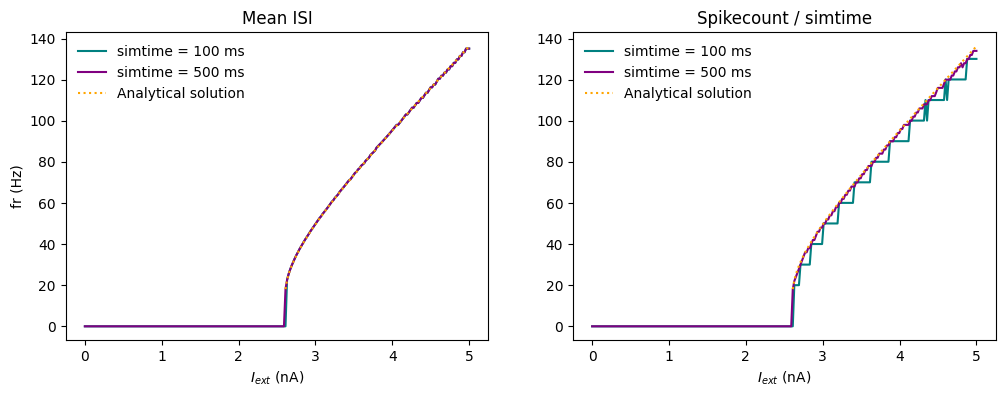

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(input_stimuli, firing_rates_100_a, label="simtime = 100 ms")
ax1.plot(input_stimuli, firing_rates_500_a, label="simtime = 500 ms")
ax1.plot(input_stimuli, analytical_frs, linestyle=":", label="Analytical solution")
ax1.set_title('Mean ISI')
ax1.set_ylabel('fr (Hz)')
ax1.set_xlabel('$I_{ext}$ (nA)')
ax1.legend(frameon=False)

ax2.plot(input_stimuli, firing_rates_100_b, label="simtime = 100 ms")
ax2.plot(input_stimuli, firing_rates_500_b, label="simtime = 500 ms")
ax2.plot(input_stimuli, analytical_frs, linestyle=":", label="Analytical solution")
ax2.set_title('Spikecount / simtime')
ax2.set_xlabel('$I_{ext}$ (nA)')
ax2.legend(frameon=False)

plt.show()

# 3. Synaptically coupled IF neurons

In [102]:
def euler_synaptic_coupling(tmax, dt, ics1, ics2, pars1, pars2, reset=False):
    
    tau_syn1 = pars1['tau_syn']
    tau_m1   = pars1['tau_m']
    R_m1     = pars1['R_m']
    g_star1 = pars1['g_star']
    E_m1     = pars1['E_m']
    E_syn1   = pars1['E_syn']
    I_e1     = pars1['I_e']
    thr1     = pars1['thr']

    V1, x1, g1, I_syn1 = ics1
    
    ts = np.arange(0, tmax, dt)

    Vs1 = np.array([])
    gs1 = np.array([])
    xs1 = np.array([])
    I_syns1 = np.array([])
    
    tau_syn2 = pars2['tau_syn']
    tau_m2   = pars2['tau_m']
    R_m2     = pars2['R_m']
    g_star2  = pars2['g_star']
    E_m2     = pars2['E_m']
    E_syn2   = pars2['E_syn']
    I_e2     = pars2['I_e']
    thr2     = pars2['thr']

    V2, x2, g2, I_syn2 = ics2

    Vs2 = np.array([])
    gs2 = np.array([])
    xs2 = np.array([])
    I_syns2 = np.array([])
    
    for t in ts:
        
        dV1dt = ( -V1 + E_m1 - R_m1*I_syn1 + R_m1*I_e1) / tau_m1
        dx1dt = -x1 / tau_syn1
        dg1dt = (x1 - g1) / tau_syn1
        I_syn1 = g1*(V1 - E_syn1) 
        
        V1 = V1 + dt*dV1dt
        x1 = x1 + dt*dx1dt
        g1 = g1 + dt*dg1dt

        dV2dt = ( -V2 + E_m2 - R_m2*I_syn2 + R_m2*I_e2) / tau_m2
        dx2dt = -x2 / tau_syn2
        dg2dt = (x2 - g2) / tau_syn2
        I_syn2 = g2*(V2 - E_syn2) 
        
        V2 = V2 + dt*dV2dt
        x2 = x2 + dt*dx2dt
        g2 = g2 + dt*dg2dt

        if reset == True and V1 >= thr1:
            V1 = E_m1
            x2 += g_star2

        if reset == True and V2 >= thr2:
            V2 = E_m2
            x1 += g_star1
        
        Vs1 = np.append(Vs1, V1)
        gs1 = np.append(gs1, g1)
        xs1 = np.append(xs1, x1)
        I_syns1 = np.append(I_syns1, I_syn1)

        Vs2 = np.append(Vs2, V2)
        gs2 = np.append(gs2, g2)
        xs2 = np.append(xs2, x2)
        I_syns2 = np.append(I_syns2, I_syn2)

    return {
        'ts' : ts / 10**-3, 

        'V_t1' : Vs1 / 10**-3, 
        'g_syn_t1' : gs1 / 10**-9, 
        'x_t1' : xs1, 
        'I_syn_t1' : I_syns1 / 10**-9,
        
        'V_t2' : Vs2 / 10**-3, 
        'g_syn_t2' : gs2 / 10**-9, 
        'x_t2' : xs2, 
        'I_syn_t2' : I_syns2 / 10**-9,
        }


In [103]:
pars_1 = {
    'E_m' : -70*10**-3,
    'R_m' : 1*10**7,
    'g_star' : 30*10**-9,
    'I_e' : 3.5*10**-9,
    'tau_syn' : 10*10**-3,
    'tau_m' : 10*10**-3,
    'thr' : -54*10**-3,
    'E_syn' : 0*10**-3,
}

pars_2 = pars_1.copy()

ics1 = [-60*10**-3, 0, 0, 0]
ics2 = [-70*10**-3, 0, 0, 0]

In [104]:
result = euler_synaptic_coupling(tmax=0.05, dt=1e-4, ics1=ics1, ics2=ics2, pars1=pars_1, pars2=pars_2, reset=True)

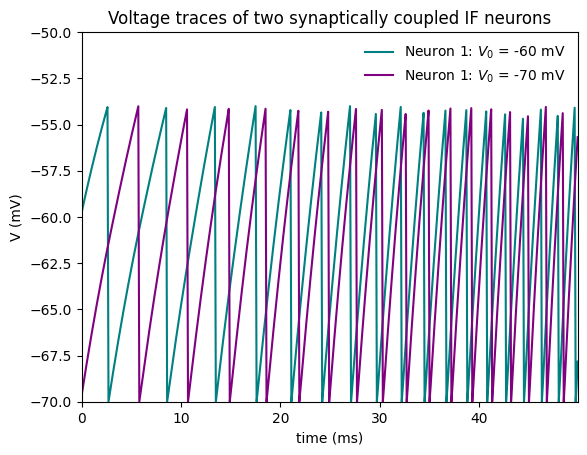

In [105]:
plt.plot(result['ts'], result['V_t1'], label="Neuron 1: $V_0$ = -60 mV")
plt.plot(result['ts'], result['V_t2'], label="Neuron 1: $V_0$ = -70 mV")
plt.legend(frameon=False)
plt.xlim(min(result['ts']), max(result['ts']))
plt.ylim([-70, -50])
plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.title('Voltage traces of two synaptically coupled IF neurons')
plt.show()

In [106]:
pars_I = pars_1.copy()
pars_I['I_e'] = 3*10**-9

pars_g = pars_1.copy()
pars_g['g_star'] = 2*pars_1['g_star']

pars_tau = pars_1.copy()
pars_tau['tau_syn'] = 2*pars_1['tau_syn']

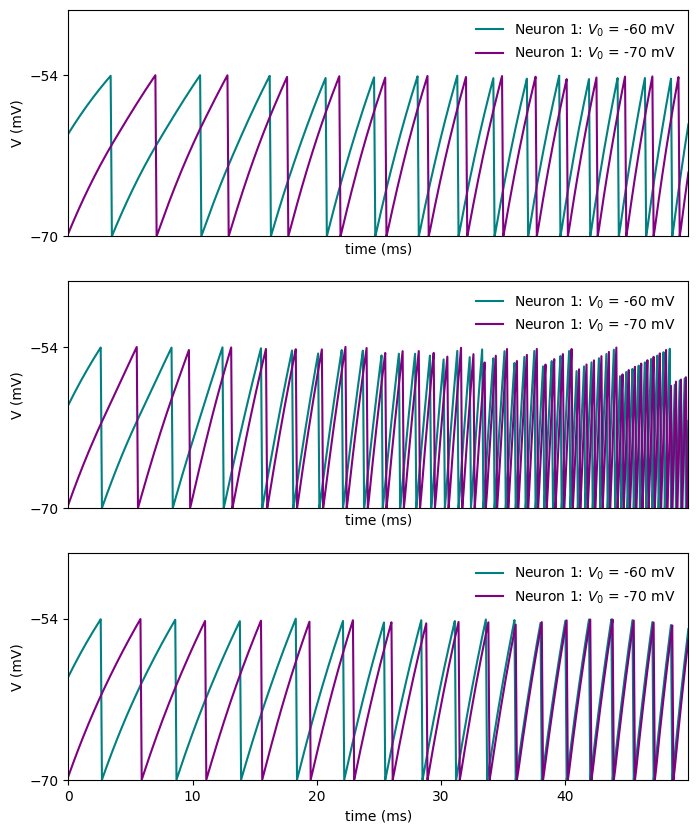

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

for pars, ax in zip([pars_I, pars_g, pars_tau], [ax1, ax2, ax3]):
    result = euler_synaptic_coupling(tmax=0.05, dt=1e-4, ics1=ics1, ics2=ics2, pars1=pars, pars2=pars, reset=True)
    ax.plot(result['ts'], result['V_t1'], label="Neuron 1: $V_0$ = -60 mV")
    ax.plot(result['ts'], result['V_t2'], label="Neuron 1: $V_0$ = -70 mV")
    ax.legend(frameon=False)
    ax.set_xlim(min(result['ts']), max(result['ts']))
    ax.set_yticks([-70, -54])
    ax.set_ylim([-70, -47.5])
    ax.set_ylabel('V (mV)')
    ax.set_xlabel('time (ms)')
    if ax != ax3:
        ax.set_xticks([])

plt.show()